In [19]:
import keras
print(keras.__version__)

2.9.0


In [21]:
from keras.datasets import imdb
(train_data, train_labels),(test_data, test_labels) = imdb.load_data(num_words=10000)
#상위 10000개만

In [22]:
train_data.shape

(25000,)

In [23]:
train_data[0]

[1,
 14,
 22,
 16,
 43,
 530,
 973,
 1622,
 1385,
 65,
 458,
 4468,
 66,
 3941,
 4,
 173,
 36,
 256,
 5,
 25,
 100,
 43,
 838,
 112,
 50,
 670,
 2,
 9,
 35,
 480,
 284,
 5,
 150,
 4,
 172,
 112,
 167,
 2,
 336,
 385,
 39,
 4,
 172,
 4536,
 1111,
 17,
 546,
 38,
 13,
 447,
 4,
 192,
 50,
 16,
 6,
 147,
 2025,
 19,
 14,
 22,
 4,
 1920,
 4613,
 469,
 4,
 22,
 71,
 87,
 12,
 16,
 43,
 530,
 38,
 76,
 15,
 13,
 1247,
 4,
 22,
 17,
 515,
 17,
 12,
 16,
 626,
 18,
 2,
 5,
 62,
 386,
 12,
 8,
 316,
 8,
 106,
 5,
 4,
 2223,
 5244,
 16,
 480,
 66,
 3785,
 33,
 4,
 130,
 12,
 16,
 38,
 619,
 5,
 25,
 124,
 51,
 36,
 135,
 48,
 25,
 1415,
 33,
 6,
 22,
 12,
 215,
 28,
 77,
 52,
 5,
 14,
 407,
 16,
 82,
 2,
 8,
 4,
 107,
 117,
 5952,
 15,
 256,
 4,
 2,
 7,
 3766,
 5,
 723,
 36,
 71,
 43,
 530,
 476,
 26,
 400,
 317,
 46,
 7,
 4,
 2,
 1029,
 13,
 104,
 88,
 4,
 381,
 15,
 297,
 98,
 32,
 2071,
 56,
 26,
 141,
 6,
 194,
 7486,
 18,
 4,
 226,
 22,
 21,
 134,
 476,
 26,
 480,
 5,
 144,
 30,
 5535,
 18,

In [24]:
train_labels[0]

1

In [25]:
word_index = imdb.get_word_index()
word_index.items() #항목들 가져오기
reverse_word_index = dict([value, key] for (key, value) in word_index.items())

In [26]:
decoded_review = ' '.join([reverse_word_index.get(i-3,'?') for i in train_data[0]])
decoded_review
#없는 문자를 ?로 치환해줘
#첫번째 것만 뒤집어서 확인

"? this film was just brilliant casting location scenery story direction everyone's really suited the part they played and you could just imagine being there robert ? is an amazing actor and now the same being director ? father came from the same scottish island as myself so i loved the fact there was a real connection with this film the witty remarks throughout the film were great it was just brilliant so much that i bought the film as soon as it was released for ? and would recommend it to everyone to watch and the fly fishing was amazing really cried at the end it was so sad and you know what they say if you cry at a film it must have been good and this definitely was also ? to the two little boy's that played the ? of norman and paul they were just brilliant children are often left out of the ? list i think because the stars that play them all grown up are such a big profile for the whole film but these children are amazing and should be praised for what they have done don't you th

In [27]:
# 데이터를 준비
import numpy as np

def vectorize_sequences(sequences, dimension=10000):
  results = np.zeros((len(sequences),dimension))

  for i, sequence in enumerate(sequences):
    results[i, sequence] = 1

  return results

# Data의 Encoding
x_train = vectorize_sequences(train_data)
x_test = vectorize_sequences(test_data)

In [28]:
print(x_train[0])

[0. 1. 1. ... 0. 0. 0.]


In [29]:
# float type으로 변환
y_train = np.asarray(train_labels).astype('float32')
y_test = np.asarray(test_labels).astype('float32')

In [37]:
# 신경망의 구축
from keras import models
from keras import layers

model = models.Sequential()
model.add(layers.Dense(16, activation='relu', input_shape=(10000,)))
model.add(layers.Dense(16, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))

In [40]:
from tensorflow.keras import optimizers
model.compile(optimizer=optimizers.RMSprop(lr=0.001),  #제약을 걸어 덜 학습하게 함.
              loss='binary_crossentropy',
              metrics=['accuracy'])

/usr/local/lib/python3.7/dist-packages/keras/optimizers/optimizer_v2/rmsprop.py:135: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(RMSprop, self).__init__(name, **kwargs)


In [32]:
x_val = x_train[:10000]
partial_x_train = x_train[10000:]

y_val = y_train[:10000]
partial_y_train = y_train[10000:]

In [41]:
history = model.fit(partial_x_train,
                    partial_y_train,
                    epochs=20,
                    batch_size=512,
                    validation_data=(x_val, y_val))

Epoch 1/20
30/30 [==============================] - 2s 60ms/step - loss: 0.1504 - accuracy: 0.9490 - val_loss: 0.2815 - val_accuracy: 0.8892
Epoch 2/20
30/30 [==============================] - 1s 35ms/step - loss: 0.1190 - accuracy: 0.9630 - val_loss: 0.2974 - val_accuracy: 0.8857
Epoch 3/20
30/30 [==============================] - 2s 59ms/step - loss: 0.1005 - accuracy: 0.9698 - val_loss: 0.3304 - val_accuracy: 0.8772
Epoch 4/20
30/30 [==============================] - 1s 36ms/step - loss: 0.0840 - accuracy: 0.9757 - val_loss: 0.3378 - val_accuracy: 0.8782
Epoch 5/20
30/30 [==============================] - 1s 36ms/step - loss: 0.0702 - accuracy: 0.9806 - val_loss: 0.3535 - val_accuracy: 0.8777
Epoch 6/20
30/30 [==============================] - 1s 36ms/step - loss: 0.0568 - accuracy: 0.9859 - val_loss: 0.3865 - val_accuracy: 0.8781
Epoch 7/20
30/30 [==============================] - 1s 36ms/step - loss: 0.0475 - accuracy: 0.9885 - val_loss: 0.4020 - val_accuracy: 0.8753
Epoch 8/20
30

In [34]:
#실험 결과 데이터를 가져온다.

acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(1, len(acc)+1)


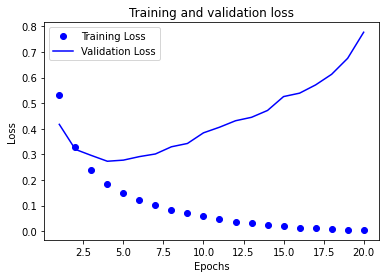

In [42]:
# 실험 결과를 시각화 한다. 
import matplotlib.pyplot as plt

plt.plot(epochs, loss, 'bo', label='Training Loss')
plt.plot(epochs, val_loss,'b-', label='Validation Loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

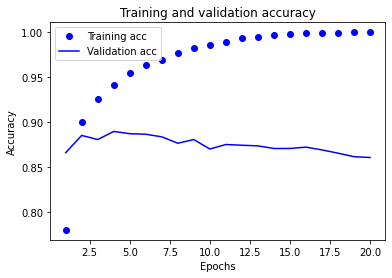

In [36]:
plt.plot(epochs, acc, 'bo', label = 'Training acc')
plt.plot(epochs, val_acc, 'b-', label = 'Validation acc')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

In [39]:
history = model.fit(partial_x_train,
                    partial_y_train,
                    epochs=3,
                    batch_size=256,
                    validation_data=(x_val, y_val))

Epoch 1/3
59/59 [==============================] - 3s 36ms/step - loss: 0.4749 - accuracy: 0.8247 - val_loss: 0.3394 - val_accuracy: 0.8787
Epoch 2/3
59/59 [==============================] - 1s 22ms/step - loss: 0.2610 - accuracy: 0.9109 - val_loss: 0.2813 - val_accuracy: 0.8911
Epoch 3/3
59/59 [==============================] - 1s 22ms/step - loss: 0.1863 - accuracy: 0.9356 - val_loss: 0.2759 - val_accuracy: 0.8904
